In [21]:
import torch   # Importing the PyTorch library for building machine learning models

In [22]:
import torchvision   # Importing the torchvision library, which provides popular datasets and tools for computer vision

In [23]:
print("PyTorch version",torch.__version__)   # Printing the version of PyTorch being used to ensure compatibility

PyTorch version 2.2.2


In [24]:
torchvision.datasets.MNIST   # Loads the MNIST dataset of handwritten digits (0-9)

torchvision.datasets.mnist.MNIST

In [25]:
from torchvision import datasets   # Importing the MNIST dataset from torchvision's datasets module
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True)   # Loading the training dataset of MNIST
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True)   # Loading the test dataset of MNIST

In [26]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.


In [27]:
transform = transforms.Compose([transforms.ToTensor(),   # Converts the images to PyTorch tensors.  
                                transforms.Normalize((0.5,), (0.5,))   # Normalizes the tensor values to the range [-1, 1] 
                               ])

In [28]:
# Load the training dataset (MNIST), apply the transformations, and download if necessary.
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)

In [29]:
# Create a DataLoader for the training set with a batch size of 64 and shuffling enabled.
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [30]:
# Load the test dataset (MNIST), apply the transformations, and download if necessary.
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=transform)

In [31]:
# Create a DataLoader for the test set with a batch size of 64, without shuffling.
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

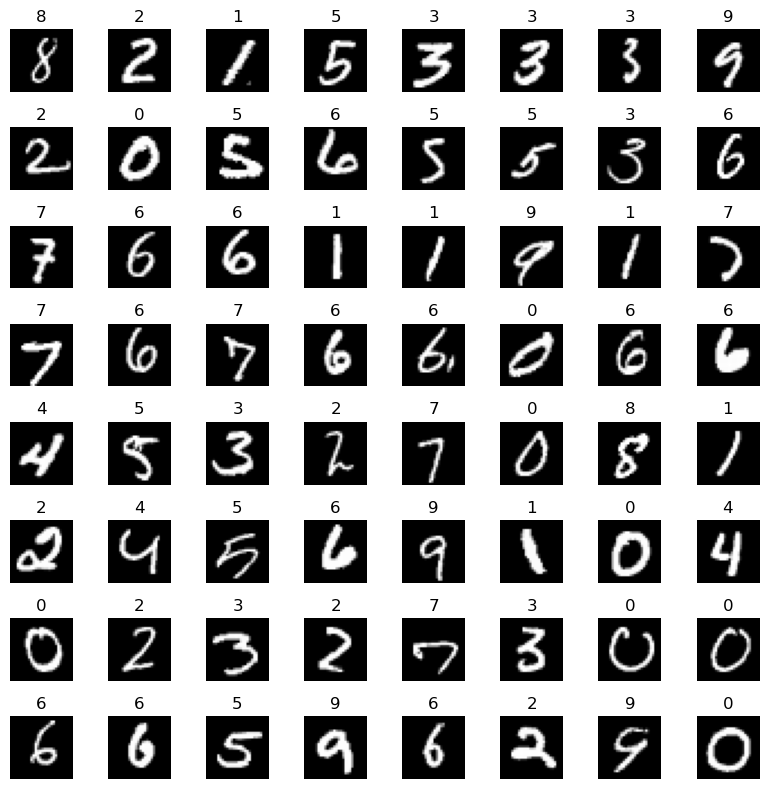

In [32]:
# Function to visualize a batch of images from the loader.
def show_batch(loader):
    data_iter = iter(loader)   # Create an iterator to go through the DataLoader.
    images, labels = next(data_iter)   # Get the next batch of images and labels.
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))    # Create an 8x8 grid of subplots to display 64 images.
    axes = axes.flatten()   # Flatten the axes to a 1D array for easier indexing.
    for i in range(64):   # Loop through the 64 images.
        image = images[i].numpy().squeeze()   # Convert the image tensor to a NumPy array and remove extra dimensions.
        axes[i].imshow(image, cmap='gray')   # Display the image in grayscale.
        axes[i].set_title(f'{labels[i].item()}')   # Set the title of each subplot to the corresponding label.
        axes[i].axis('off')   # Turn off axis ticks and labels.
    plt.tight_layout()   # Adjust the layout to prevent overlapping.
    plt.show()   # Display the grid of images.

show_batch(train_loader)   # Call the function to show a batch of training images.


In [55]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.

custom_transform = transforms.Compose([
    transforms.Resize((30, 30)),   # Ensure all images are resized to 30x30 pixels                 
    transforms.RandomRotation(10),   # Apply a random rotation to the image by up to 10 degrees 
    transforms.RandomCrop(28),   # Crop to 28x28 pixels randomly
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),   # Adjust color properties
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),   # Apply Gaussian blur
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),   # Randomly erase parts of the image
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),    # Apply random translation to shift images by 10% of width and height
    transforms.Pad(2),    # Add padding of 2 pixels to increase image size to 34x34                          
    transforms.ToTensor(),    # Convert image to a PyTorch tensor and normalize pixel values to [0, 1]                       
    transforms.Normalize((0.5,), (0.5,)),])    # Normalize tensor values to the range [-1, 1]

In [56]:
# Load the MNIST dataset for training and testing
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=custom_transform)
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=custom_transform)

In [57]:
# Create DataLoader objects for batching and shuffling the data during training/testing
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

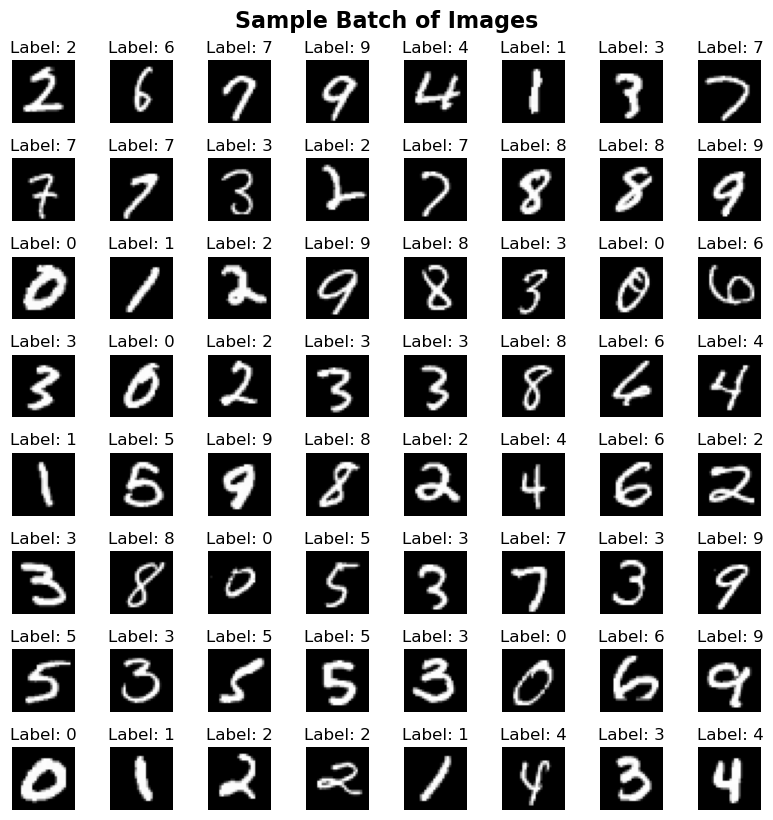

In [59]:
def show_batch(loader, num_images=64):
    data_iter = iter(loader)  # Create an iterator from the data loader
    images, labels = next(data_iter)  # Get a batch of images and labels

    num_cols = 8  # Determine the number of columns for the subplot grid
    num_rows = num_images // num_cols if num_images % num_cols == 0 else (num_images // num_cols) + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))  # Set up the figure for displaying images
    axes = axes.flatten()

    for i in range(num_images):  # Loop through the number of images to display
        image = images[i].numpy().squeeze()  # Convert image tensor to numpy array
        axes[i].imshow(image, cmap='gray')  # Display the image in grayscale
        axes[i].set_title(f'Label: {labels[i].item()}')  # Show the corresponding label
        axes[i].axis('off')  # Hide the axes

    for j in range(num_images, len(axes)):  # Hide any remaining empty subplots if num_images is not a multiple of num_cols
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.suptitle('Sample Batch of Images', fontsize=16, fontweight='bold', y=1.02)  # Title for the entire plot
    plt.show()  # Show the figure

# Show a batch of images from the train_loader
show_batch(train_loader)
